In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = np.loadtxt('dataCircle.txt')
data = pd.DataFrame(data, columns=['X1', 'X2', 'Y'])

data

,X1,X2,Y
0,0.00000,0.00000,1.0
1,-3.70962,-5.35210,1.0
2,-1.42211,-2.40219,1.0
3,-2.66972,4.30397,1.0
4,1.55548,4.93590,1.0
5,-1.59524,6.23187,1.0
6,-5.55343,-1.67754,1.0
7,-5.57887,-0.37315,1.0
8,2.91409,4.75527,1.0
9,-1.92258,-5.99233,1.0


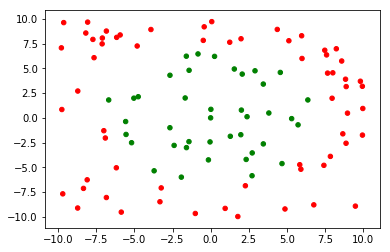

In [19]:
positives = data[data['Y'] > 0]
negatives = data[data['Y'] <= 0]

plt.scatter(positives['X1'], positives['X2'], s=20*abs(positives['Y']), c='green')
plt.scatter(negatives['X1'], negatives['X2'], s=20*abs(negatives['Y']), c='red')

In [25]:
distribution = 1/data.shape[0]

data['distribution']= distribution
data.head()

,X1,X2,Y,distribution
0,0.00000,0.00000,1.0,0.009804
1,-3.70962,-5.35210,1.0,0.009804
2,-1.42211,-2.40219,1.0,0.009804
3,-2.66972,4.30397,1.0,0.009804
4,1.55548,4.93590,1.0,0.009804


In [26]:
def get_theeta_parity(feature, data):
    mean = data.groupby('Y')[feature].mean()

    mu_plus = mean[1]
    mu_minus = mean[-1]

    theta = (mu_plus + mu_minus) / 2;
    parity = (mu_plus > mu_minus) * 2 - 1;

    return theta, parity

def get_parity(feature, theeta):
    if (feature >= theeta):
        return 1
    else:
        return -1
    
def weak_classifier(feature, theta, threshold_parity):
    if (get_parity(feature, theta) < threshold_parity):
        return 1
    else:
        return -1

In [27]:
theta_X1, theta_parity_X1 = get_theeta_parity('X1',data)
output_X1 = []

for a in data['X1']:
    out = weak_classifier(a, theta_X1, theta_parity_X1)
    output_X1.append(out)

In [28]:
theta_X2, theta_parity_X2 = get_theeta_parity('X2',data)
output_X2 = []

for a in data['X2']:
    out = weak_classifier(a, theta_X2, theta_parity_X2)
    output_X2.append(out)

In [29]:
error_X1 = (data['distribution']*(data['Y'] == output_X1)).sum()

error_X2 = (data['distribution']*(data['Y'] == output_X2)).sum()

print('Error_X1:', error_X1)
print('Error_X2:', error_X2)

Error_X1: 0.6078431372549018
Error_X2: 0.6078431372549018


In [30]:
normalizer_X1 = data['distribution'].sum()

alpha_X1 = 0.5*np.log((1-error_X1)/error_X1)
alpha_X2 = 0.5*np.log((1-error_X2)/error_X2)

print ("Alpha X1:", alpha_X1)
print ("Alpha X2:", alpha_X2)

data['distribution_1'] = (data['distribution']/normalizer_X1)*np.exp(-alpha_X2*data['Y']*output_X2)

normalizer_X2 = data['distribution_1'].sum()

data['distribution_2'] = (data['distribution']/normalizer_X2)*np.exp(-alpha_X2*data['Y']*output_X2)

Alpha X1: -0.2191274654655773
Alpha X2: -0.2191274654655773


In [31]:
data.head()

,X1,X2,Y,distribution,distribution_1,distribution_2
0,0.00000,0.00000,1.0,0.009804,0.007875,0.007348
1,-3.70962,-5.35210,1.0,0.009804,0.007875,0.007348
2,-1.42211,-2.40219,1.0,0.009804,0.007875,0.007348
3,-2.66972,4.30397,1.0,0.009804,0.007875,0.007348
4,1.55548,4.93590,1.0,0.009804,0.007875,0.007348


In [32]:
def get_sign(x):
    if (x>0): return 1
    else: return -1

array = list(data['X1']*alpha_X1 + data['X2']*alpha_X2)
array_1 = []


for i in array:
    array_1.append(get_sign(i))
    
data['predictions'] = array_1

data['classification'] = data['Y'] == data['predictions'] 

data.head()

,X1,X2,Y,distribution,distribution_1,distribution_2,predictions,classification
0,0.00000,0.00000,1.0,0.009804,0.007875,0.007348,-1,False
1,-3.70962,-5.35210,1.0,0.009804,0.007875,0.007348,1,True
2,-1.42211,-2.40219,1.0,0.009804,0.007875,0.007348,1,True
3,-2.66972,4.30397,1.0,0.009804,0.007875,0.007348,-1,False
4,1.55548,4.93590,1.0,0.009804,0.007875,0.007348,-1,False


In [33]:
a = data[data['classification']==True].shape[0]

accuracy = (a/data.shape[0])*100

print (accuracy, '%')

56.86274509803921 %


In [34]:
predicted_X2 = (array - (data['X1']*alpha_X1))/alpha_X2

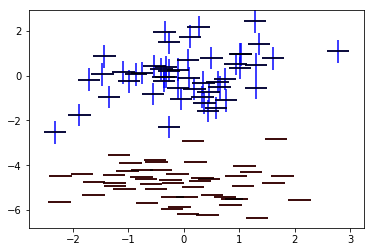

In [210]:
positives = data[data['Y'] > 0]
negatives = data[data['Y'] <= 0]
 
plt.scatter(positives['X1'], positives['X2'], marker='+', s=500*abs(positives['Y']), c='blue')
plt.scatter(negatives['X1'], negatives['X2'], marker='_', s=500*abs(negatives['Y']), c='red')
plt.scatter(data['X1'], predicted_X2, marker='_', s=500*abs(negatives['Y']), c='black')
plt.show()